# Logarithms

The logarithm is the inverse exponential function of base b. That is, 

$$ \text{if  } y = e^x $$ 

$$ \text{then  } log_e y = x $$

From the two equations above, it follows that

$$  log_e e^x = x $$

Here $e$ is an irrational constant called Euler’s number that begins with 2.718281828459.

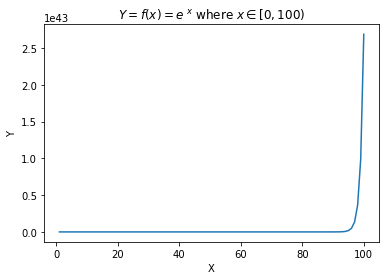

In [2]:
import pandas as pd 
import seaborn as sns
import math
from math import log, exp
from matplotlib import pyplot as plt

data = pd.DataFrame()

data['X'] = range(1, 101)

data['Y'] = data['X'].apply(lambda x: math.e ** x)

# data['Y2'] = # such that Y2 == X, just using Y 

axs = sns.lineplot(data=data, x='X', y='Y');
axs.set(title="$Y = f(x) = e^{~x}$" + " where " + "$x \in [0, 100)$");

In [8]:
data['X'] = data['Y'].apply(lambda x: log(x))

In [9]:
data

,Y,X
0,2.718282e+00,1.0
1,7.389056e+00,2.0
2,2.008554e+01,3.0
3,5.459815e+01,4.0
4,1.484132e+02,5.0
...,...,...
95,4.923458e+41,96.0
96,1.338335e+42,97.0
97,3.637971e+42,98.0
98,9.889030e+42,99.0


``` {note}
Note that to use the log function in python, we have to import it from the `math` library: 

`from math import log`

Also note that the default base of the built-in `log` function is $e$.
```


Now let's try to apply the logarithm to the equation **$y = e^x$** and call it **$log(y)$**. For additional comparison, let's also compute **$log(x)$**. 

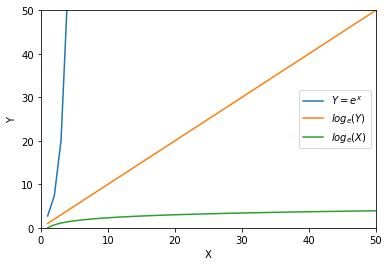

In [12]:
data['log(Y)'] = data['Y'].apply(lambda x: log(x))
data['log(X)'] = data['X'].apply(lambda x: log(x))
axs = sns.lineplot(data=data, x='X', y='Y');
axs = sns.lineplot(data=data, x='X', y='log(Y)');
axs = sns.lineplot(data=data, x='X', y='log(X)');
plt.legend(labels=['$Y = e^{x}$', '$log_e(Y)$', '$log_e(X)$']);
plt.ylim(0, 50);
plt.xlim(0, 50);

Exponential functions grow at a very fast rate. In contrast, logarithms grow a very slow rate.

In [13]:
data.tail()

,Y,X,log(Y),log(X)
95,4.923458e+41,96.0,96.0,4.564348
96,1.338335e+42,97.0,97.0,4.574711
97,3.637971e+42,98.0,98.0,4.584967
98,9.889030e+42,99.0,99.0,4.595120
99,2.688117e+43,100.0,100.0,4.605170


For comparison, there are 1e+42 stars in the universe. Meaning $2.1718^{100} >$ stars in the universe.

Logarithm to the base $e$ is called the **natural logarithm**. The natural logarithm of a number $x$ is generally written as **$\text{ln}~x$** or $log_e x$.

The relationship between the exponential function and the logarithm is preserved when considering logarithms to any other base. Therefore, more generally, 

$$ \text{if  } y = b^x $$
$$ \text{then  } log_b y = x $$

The logarithm of a number y to base b is the exponent to which we must raise b to get y.

For example, $2^3 = 8$, so $log_2 8 = 3$. 

Logarithms are very useful things, and arise often in data analysis. Here I detail three important roles logarithms play in data science. 

## Monotonically Increasing Function

A function $f (x)$ is monotonically increasing if $x_1 > x_2$ implies that $f (x_1) > f (x_2)$. 

The logarithm is a monotonically increasing function. This means that if $x_1 > x_2$ then $log(x_1) > log(x_2)$. 

This is a very useful property, because it means that we can apply a logarithmic transformation without changing the order of the data. Preserving the relative order of the data is important for many statistical techniques. 

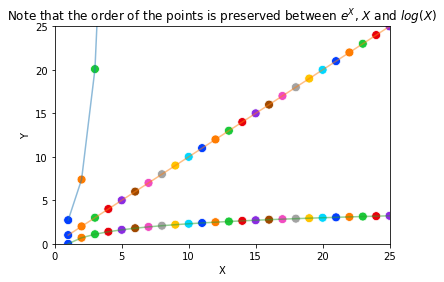

In [14]:
axs = sns.scatterplot(data=data, x='X', y='Y',      hue='X', palette='bright', s=80);
axs = sns.scatterplot(data=data, x='X', y='log(Y)', hue='X', palette='bright', s=80);
axs = sns.scatterplot(data=data, x='X', y='log(X)', hue='X', palette='bright', s=80);
axs = sns.lineplot(data=data, x='X', y='Y', label='Y', alpha=0.5);
axs = sns.lineplot(data=data, x='X', y='log(Y)', label='log(Y)', alpha=0.5);
axs = sns.lineplot(data=data, x='X', y='log(X)', label='log(X)', alpha=0.5);
axs.legend([],[], frameon=False)
axs.set(title="Note that the order of the points is preserved between $e^X$, $X$ and $log(X)$");
plt.ylim(0, 25);
plt.xlim(0, 25);

In the context of data science, this is useful because in many cases we are interested in comparing the relative size of things rather than the absolute size of things. For instance, often we are interested in answering if $P(X) > P(X)$. 

With logarithms, we can answer this question by comparing $log(P(X))$ and $log(P(X))$ instead. 

In [16]:
df = pd.DataFrame()
df['X'] = range(1, 11)
df['Y'] = range(11, 21)


In [21]:
df['log(X)']  = df['X'].apply(log)
df['log(Y)']  = df['Y'].apply(log)

In [22]:
df

,X,Y,log(X),log(Y)
0,1,11,0.000000,2.397895
1,2,12,0.693147,2.484907
2,3,13,1.098612,2.564949
3,4,14,1.386294,2.639057
4,5,15,1.609438,2.708050
5,6,16,1.791759,2.772589
6,7,17,1.945910,2.833213
7,8,18,2.079442,2.890372
8,9,19,2.197225,2.944439
9,10,20,2.302585,2.995732


In [20]:
df['X'].apply(log) < df['Y'].apply(log)

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

## Laws of Logarithms

The three laws of logarithms are:

**Product rule**:

$$ log_b (x \cdot y) = log_b x + log_b y $$

In [112]:
log(4 * 2) == log(4) + log(2)

True

<hr/>

**Quotient rule**:

$$ log_b (\frac{x}{y}) = log_b x - log_b y $$


In [113]:
log(4 / 2) == log(4) - log(2)

True

<hr/>

**Power rule**:

$$ log_b (x^r) = r \cdot log_b x $$


In [114]:
log(4**2) == 2 * log(4)

True

## Multiplying Probabilities

Logarithms were first invented as an aide to computation, by reducing the problem of multiplication to that of addition. 

In particular, to compute the product $p = x \cdot y$, we could compute the sum of the logarithms $s = log_b x+log_b y$ and then take the inverse of the logarithm (i.e. raising $b$ to the $sth$ power) to get $p$, because:

$$p = x \cdot y = b^{(log_b x+log_b y)}$$

This is the trick that powered the mechanical slide rules that geeks used in the days before pocket calculators.

However, this idea remains important today, particularly **when multiplying long chains of probabilities**.
Probabilities are small numbers. Thus multiplying long chains of probability yield very small numbers that govern the chances of very rare events. There are serious **numerical stability problems** with floating point multiplication on real computers. Numerical errors will creep in, and will eventually overwhelm the true value of small-enough numbers.

**Summing the logarithms of probabilities is much more numerically stable than multiplying them, but yields an equivalent result** because:

$$ \prod_{i=1}^{n} p_i = b^P , \text{where}~~P = \sum_{i=1}^{n} log_b(p_i) $$

We can raise our sum to an exponential if we need the real probability, but usually this is not necessary. 

When we just need to compare two probabilities to decide which one is larger we can safely stay in log world, because bigger logarithms correspond to bigger probabilities.

``` {note}
Note that the $log(P(X=x))$ are all negative numbers for the range $x \in (0, 1)$, 0 and 1 exclusive, since log(1) = 0 and log(0) is undefined. 

Equations with logs of probabilities involve negative numbers which might look odd. Don't let that throw you off. 
```

True

## Ratios of Probabilities

Ratios are quantities of the form $\frac{a}{b}$. They occur often in data sets either as elementary features or values derived from feature pairs. Ratios naturally occur in normalizing data for conditions (i.e. weight after some treatment over the initial weight) or time (i.e. today’s price over yesterday’s price).

But ratios behave differently when reflecting increases than decreases. The ratio $200/100$ is $200%$ above baseline, but $100/200$ is only 50% below despite being a similar magnitude change. Thus doing things like averaging ratios is committing a statistical sin. Do you really want a doubling followed by a halving to average out as an increase, as opposed to a neutral change?

One solution here is taking the logarithm of these ratios, so that they yield equal displacement, since $log_2(2) = 1$ and $log_2(1/2) = −1$. We get the extra bonus that a unit ratio maps to zero, so positive and negative numbers correspond to improper and proper ratios, respectively.

```{figure} ../assets/log_ratios.png
---
width: 70%
name: log_ratio
---
Plotting ratios on a scale cramps the space allocated to small ratios relative to large ratios (left). Plotting the logarithms of ratios better represents the underlying data (right).
```

A rookie mistake my students often make involves plotting the value of ratios instead of their logarithms. Figure above (left) is a graph from a student paper, showing the ratio of new score over old score on data over 24 hours (each red dot is the measurement for one hour) on four different data sets (each given a row). The solid black line shows the ratio of one, where both scores give the same result. Now try to read this graph: it isn’t easy because the points on the left side of the line are cramped together in a narrow strip. What jumps out at you are the outliers. Certainly the new algorithm does terrible on 7UM917 in the top row: that point all the way to the right is a real outlier.

Except that it isn’t. Now look at the panel  on the right, where we plot the logarithms of the ratios. The space devoted to left and right of the black line can now be equal. And it shows that this point wasn’t really such an outlier at all. The magnitude of improvement of the leftmost points is much greater than that of the rightmost points. This plot reveals that new algorithm generally makes things better, only because we are showing logs of ratios instead of the ratios themselves.

Similar to the case of multiplying probabilities, ratio of probabilities can be computed by subtracting the logarithms of the probabilities:

$$ log_{~b} (\frac{a}{b} ) = log_{~b} ( a - b ) $$

## Normalizing Skewed Distributions

Variables which follow symmetric, bell-shaped distributions tend to be nice as features in models. They show substantial variation, so they can be used to discriminate between things, but not over such a wide range that outliers are overwhelming.

But not every distribution is symmetric. Consider the one in Figure 2.13 (left). The tail on the right goes much further than the tail on the left. And we are destined to see far more lopsided distributions when we discuss power laws, in Section 5.1.5. Wealth is representative of such a distribution, where the poorest human has zero or perhaps negative wealth, the average person (optimistically) is in the thousands of dollars, and Bill Gates is pushing $100 billion as of this writing.


```{figure} ../assets/log_skew.png
---
width: 70%
name: log_skew
---
Hitting a skewed data distribution (left) with a log often yields a more bell-shaped distribution (right).
```


We need a normalization to convert such distributions into something easier to deal with. To ring the bell of a power law distribution we need something non-linear, that reduces large values to a disproportionate degree compared to more modest values.

The logarithm is the transformation of choice for power law variables. Hit your long-tailed distribution with a log and often good things happen. The distribution in Figure 2.13 happened to be the log normal distribution, so taking the logarithm yielded a perfect bell-curve on right. Taking the logarithm of variables with a power law distribution brings them more in line with traditional distributions. For example, as an upper-middle class professional, my wealth is roughly the same number of logs from my starving students as I am from Bill Gates!

Sometimes taking the logarithm proves too drastic a hit, and a less dramatic non-linear transformation like the square root works better to normalize a dis- tribution. The acid test is to plot a frequency distribution of the transformed values and see if it looks bell-shaped: grossly-symmetric, with a bulge in the middle. That is when you know you have the right function.


<hr/>

In `matplotlib` you can specify the use of log scale for an axis with **`plt.yscale('log')`** or **`plt.xscale('log')`**. 

Example code cell below. Note how the values on the y-axis are still evenly spaced but increase exponentially.

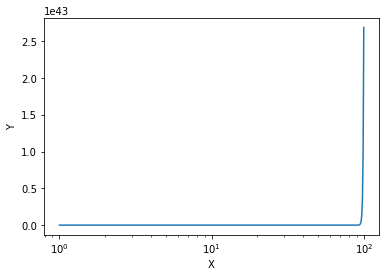

In [33]:
df = pd.DataFrame()
df['X'] = range(1, 101)
df['Y'] = df['X'].apply(lambda x: math.e ** x)

sns.lineplot(data=df, x='X', y='Y');
plt.xscale('log');

Similarly, you can specify the use of log scale for both axes with **`log_scale = [True, False]`** in most plotting functions in `seaborn`. The first value in the list is for the x-axis, the second for the y-axis. `True` means log scale, `False` means the default linear scale.

In [ ]:
import math 
import pandas as pd
df = pd.DataFrame()
df['X'] = range(1, 100)
df['Y'] = df['X'].apply(lambda x: 2 ** x)
sns.histplot(data=df, x='Y');


KeyboardInterrupt: 

In [ ]:
ax = sns.histplot(data=df, x='Y', log_scale=[False, True]);
ax.set(title="Y-axis is log-scaled");
plt.figure();
ax = sns.histplot(data=df, x='Y', log_scale=[True, False]);
ax.set(title="X-axis is log-scaled");